<a href="https://colab.research.google.com/github/RodMendez/Estad-stica/blob/main/Modelo_no_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

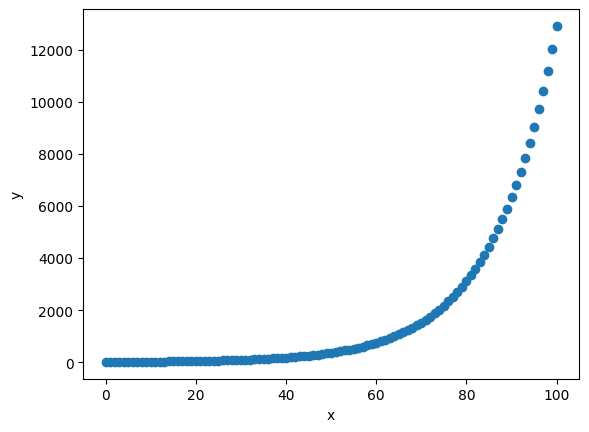

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fijar valor para seed
np.random.seed(23)

# Generar x como 100 enteros
x = np.arange(0, 101, 1)

# Generar y como a*e^(bx)+c
a = np.random.uniform(0, 20)
b = np.random.uniform(0.005, 0.075)
c = np.random.uniform(0, 5)
y = a * np.exp(b * x) + c

# Graficar los datos
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

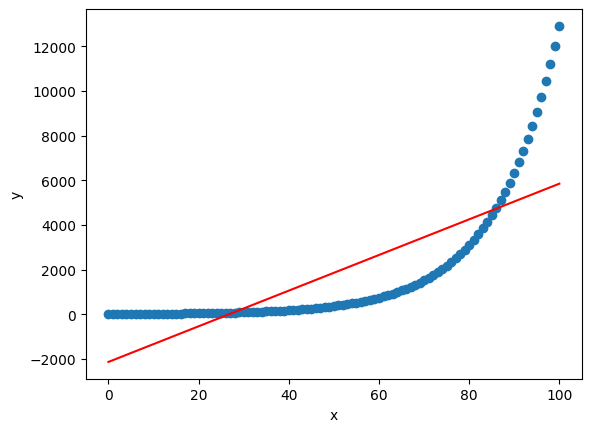

a 79.7705879622444
b: -2129.1554267233464


In [ ]:
# Modelo lineal
lin_mod = np.polyfit(x, y, 1)

# Graficar el modelo lineal
plt.scatter(x, y)
plt.plot(x, lin_mod[0] * x + lin_mod[1], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


print("a", lin_mod[0])
print("b:", lin_mod[1])

In [ ]:
# Cálculo del error para el modelo lineal
error = y - (lin_mod[0] * x + lin_mod[1])
lm_error = np.sqrt(np.mean(error ** 2))

print(f"Error del Modelo Lineal: {lm_error}")


Error del Modelo Lineal: 1885.8433870753947


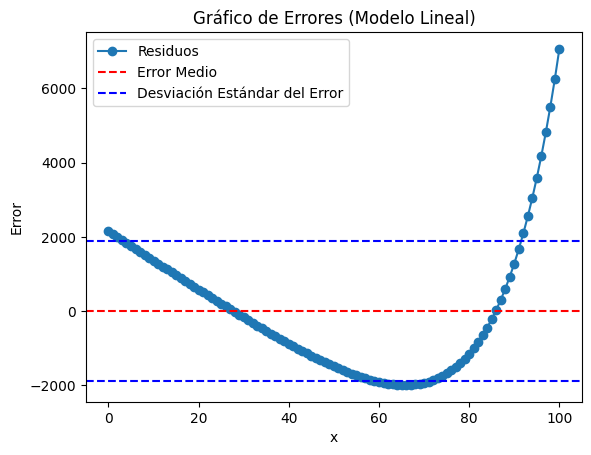

In [ ]:

# Graficar errores para el modelo lineal
plt.plot(x, error, marker='o', label='Residuos')
plt.axhline(0, color='red', linestyle='--', label='Error Medio')
plt.axhline(lm_error, color='blue', linestyle='--', label='Desviación Estándar del Error')
plt.axhline(-lm_error, color='blue', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.title('Gráfico de Errores (Modelo Lineal)')
plt.show()

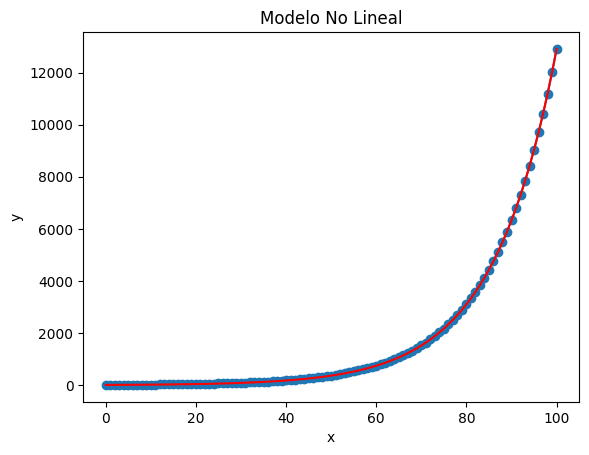

a: 10.430352288577684, b: 0.07120658840099138


In [ ]:
# Modelo no lineal
def nonlinear_func(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(nonlinear_func, x, y, p0=(13, 0.1))

# Graficar el modelo no lineal
plt.scatter(x, y)
plt.plot(x, y)
plt.plot(x, nonlinear_func(x, *params), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Modelo No Lineal')
plt.show()

a_est, b_est = params
print(f"a: {a_est}, b: {b_est}")


Error del Modelo No Lineal: 2.5693146294523217


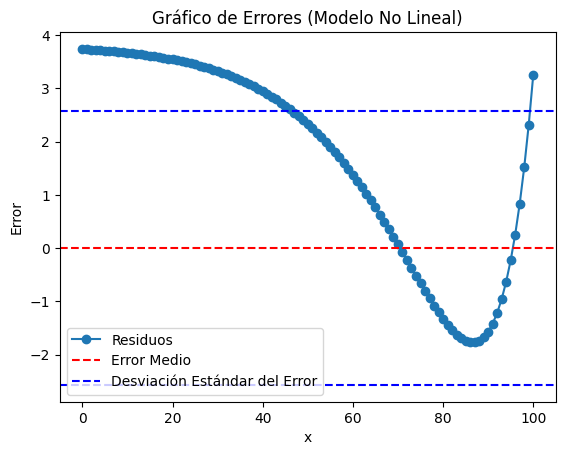

In [ ]:

# Cálculo del error para el modelo no lineal
error2 = y - nonlinear_func(x, *params)
nlm_error = np.sqrt(np.mean(error2 ** 2))

print(f"Error del Modelo No Lineal: {nlm_error}")

# Graficar errores para el modelo no lineal
plt.plot(x, error2, marker='o', label='Residuos')
plt.axhline(0, color='red', linestyle='--', label='Error Medio')
plt.axhline(nlm_error, color='blue', linestyle='--', label='Desviación Estándar del Error')
plt.axhline(-nlm_error, color='blue', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.title('Gráfico de Errores (Modelo No Lineal)')
plt.show()


